### K - Means Clustering

K-Means clustering is a type of unsupervised learning, where the goal of this algorithm is to find groups/clusters of data and group other data points accordingly based on feature similarity.

## Clustering on Iris Dataset

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). The dataset is often used in data mining, classification and clustering examples and to test algorithms.

###### Performed By : Muatif Shaikh 

In [1]:
# Importing the requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the iris dataset
# Iris dataset can also be found in sklearn library as an inbuilt dataset.
# I also have the csv file for the iris dataset so i will be using that dataset.

### Loading the iris dataset from sklearn 
# from sklearn import datasets
# iris = datasets.load_iris()
# iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
# iris_df.head()

# Loading the iris dataset from my local csv file
df_iris = pd.read_csv(r'Iris.csv', header = 0, index_col = 0)
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df_iris.shape

(150, 5)

In [4]:
# Checking for missing values in the dataset
df_iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

##### Data Preparation

In [5]:
# Creating a X variable for all the independent variables
X = df_iris.values[:, [0, 1, 2, 3]]
X.shape

(150, 4)

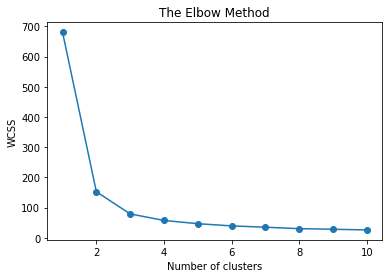

In [6]:
# Using the elbow method to find optimum number of clusters
# Create an empty array for wcss; wcss is the sum of the of squared distance between each data point with the centroid of the cluster
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.scatter(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

With the above elbow method visualization, the optimum number of clusters at the elbow point is 3, which indicates the WCSS does not decrease more beyond this number of cluster with every iteration

In [7]:
# Fitting KMeans to the dataset
kmeans = KMeans(n_clusters = 3, random_state = 123)
Y_pred = kmeans.fit_predict(X)

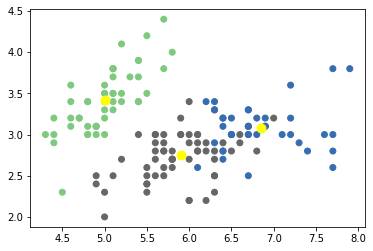

In [8]:
# Visualizing the clusters.
plt.scatter(X[:, 0], X[:, 1], c = Y_pred, cmap='Accent')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s = 80, c = 'yellow')
plt.show()

In the above visualization, three clusters are formed on the dataset, and the yellow points are the centroids of the clusters.